# **Hypothyroidism Analysis.**

The following analysis will be conducted using data collected by The Nairobi Hospital.

## 1. Defining the Question.

### a) Specifying the Question

To build a model that determines whether or a the patient's symptoms indicate that they will test positive or negative for hypothyroidism.

### b) Defining the Metric for Success

Since this is a medical dataset, having a model that is at least 90% accurate (without overfitting) will prove successful. This will be done by the following classifiers:

*   Decision Trees
*   Standard Vector Models(SVM)



### c) Context of the study

Determining the main signs and symptoms of that could indicate the presence of hypothyroidism for more accurate diagnosis.

### d) Recording the Experimental Design



1. Loading and reading data. 
2. Exploratory analysis  
3. Modelling
 *   data cleaning for SVM
4. Challenging the solution. 




## 2. Reading and checking the Data.

In [2]:
# importing libraries
#
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.svm import SVC,LinearSVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus



In [4]:
# load data
#
hypothyr = pd.read_csv('hypothyroid.csv')
hypothyr

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?


In [72]:
hypothyr.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

The columns in the dataset:

* status
* Age
* Sex
* on_thyroxine
* query_on_thyroxine
* on_antithyroid_medicationthyroid_surgery
* query_hypothyroid
* query_hyperthyroid
* pregnant
* sick
* tumor
* lithium
* goitre
* TSH_measured
* TSH
* T3_measured
* T3
* TT4_measured
* TT4 
* T4U_measured
* T4U
* FTI_measured
* FTI
* TBG_measured
* TBG  





In [5]:
# check the top of the dataset
#
hypothyr = pd.read_csv('hypothyroid.csv')
hypothyr.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [6]:
# check bottom of the dataset
#
hypothyr = pd.read_csv('hypothyroid.csv')
hypothyr.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


## 3. External Data Source Validation

### a.Validation

The data source is valid.

## 4. Tidying the Dataset

In [7]:
# check for duplicates and missing values
#
print(hypothyr.isnull().sum())
print('*' * 50)
print(hypothyr.duplicated().sum())

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64
**************************************************
77


In [8]:
# replacing ? in TBG with numeric values
#
hypothyr['TBG'].replace({'?': 0}, inplace=True)

hypothyr['TBG'] = hypothyr['TBG'].astype(float)

In [9]:
# encode the categorical columns
#
from sklearn.preprocessing import LabelEncoder
categorical_feature_mask = hypothyr.dtypes==object
categorical_cols = hypothyr.columns[categorical_feature_mask].tolist()

le = LabelEncoder()
hypothyr[categorical_cols] = hypothyr[categorical_cols].apply(lambda col: le.fit_transform(col))
hypothyr[categorical_cols].head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,67,2,0,0,0,0,0,0,0,...,134,1,7,1,55,1,116,1,2,0
1,0,6,1,1,0,0,0,0,0,0,...,79,1,18,1,99,1,81,1,79,0
2,0,15,2,0,0,0,0,0,0,0,...,0,1,3,1,193,1,68,1,0,0
3,0,15,1,0,0,0,0,0,0,0,...,158,1,5,1,219,1,72,1,220,0
4,0,72,2,0,0,0,0,0,0,0,...,200,1,13,1,216,1,96,1,196,0


Outliers, missing values and duplicates aren't dropped for decison trees but it is worth noting their presence for the sake of SVM.

## 5. Exploratory Analysis

Univariate Analysis.

In [10]:
hypothyr.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,...,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,0.952261,50.978501,1.263990,0.145748,0.017389,0.013279,0.032880,0.076193,0.076826,0.019918,...,0.780272,31.306355,0.921277,139.273475,0.921593,73.073348,0.921910,131.981663,0.082200,2.571483
std,0.213248,25.400502,0.490443,0.352909,0.130735,0.114483,0.178351,0.265349,0.266357,0.139740,...,0.414128,21.727338,0.269348,107.492721,0.268853,32.589482,0.268356,113.336785,0.274713,10.204298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,16.000000,1.000000,26.000000,1.000000,54.000000,1.000000,22.500000,0.000000,0.000000
50%,1.000000,51.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,23.000000,1.000000,136.000000,1.000000,66.000000,1.000000,80.000000,0.000000,0.000000
75%,1.000000,69.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,41.000000,1.000000,250.000000,1.000000,79.000000,1.000000,264.000000,0.000000,0.000000
max,1.000000,92.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,69.000000,1.000000,268.000000,1.000000,158.000000,1.000000,280.000000,1.000000,122.000000


In [11]:
# measeures of central tendancy and spread
#
print(hypothyr.kurt())
print('*' * 50)
print(hypothyr.skew())
print('*' * 50)
print(hypothyr.median())
print('*' * 50)
print(hypothyr.mode())

status                         16.024369
age                            -1.002065
sex                            -0.465073
on_thyroxine                    2.036901
query_on_thyroxine             52.611814
on_antithyroid_medication      70.436172
thyroid_surgery                25.489632
query_hypothyroid               8.221847
query_hyperthyroid              8.114398
pregnant                       45.300146
sick                           27.026406
tumor                          74.206957
lithium                      1578.997469
goitre                         27.026406
TSH_measured                    1.937159
TSH                            -0.745894
T3_measured                    -0.165682
T3                             -0.722642
TT4_measured                    7.802486
TT4                            -1.810201
T4U_measured                    7.853415
T4U                             1.602664
FTI_measured                    7.904760
FTI                            -1.768761
TBG_measured    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


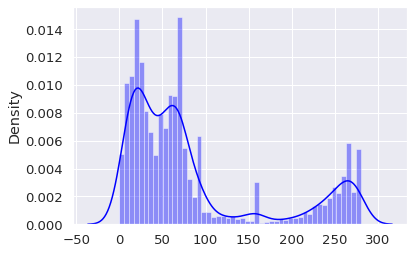

In [12]:
#visualisation using distribution plots
#
numerical = ['age', 'T3', 'TT4', 'T4U', 'FTI']

sns.distplot(hypothyr[numerical], color='blue');


Bivariate Analysis.

In [13]:
# displaying a correlation table
#
hypothyr.corr()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
status,1.000000,-0.011166,0.011680,0.033652,0.029785,0.013020,-0.041868,-0.047477,0.025616,0.021306,...,-0.068682,0.140354,-0.065451,-0.057073,-0.065308,-0.004138,-0.065165,-0.052220,0.050812,0.043352
age,-0.011166,1.000000,-0.053212,-0.061532,-0.010840,-0.045144,-0.009827,0.023610,-0.103482,-0.143062,...,0.188870,-0.261888,0.111017,-0.022425,0.109046,-0.230363,0.109156,-0.043434,-0.109473,-0.112827
sex,0.011680,-0.053212,1.000000,-0.101774,0.056627,-0.011758,-0.034185,-0.047683,-0.046360,-0.081361,...,0.084820,-0.111348,0.083154,0.064894,0.082674,-0.150522,0.084596,-0.060939,-0.083652,-0.092716
on_thyroxine,0.033652,-0.061532,-0.101774,1.000000,-0.013820,-0.024433,0.029355,0.070498,-0.088877,-0.001168,...,-0.161656,0.158041,0.060856,-0.137582,0.060482,0.001627,0.063447,-0.115951,-0.064897,-0.060100
query_on_thyroxine,0.029785,-0.010840,0.056627,-0.013820,1.000000,-0.015432,0.016162,-0.019971,-0.038375,-0.018964,...,-0.087123,0.074613,0.038886,0.005198,0.038801,-0.052630,0.038716,-0.005763,-0.039811,-0.033528
on_antithyroid_medication,0.013020,-0.045144,-0.011758,-0.024433,-0.015432,1.000000,-0.005901,-0.033315,0.122105,0.003231,...,-0.018487,0.040067,-0.048139,0.014225,-0.048364,0.053819,-0.048590,0.036214,0.045730,0.032215
thyroid_surgery,-0.041868,-0.009827,-0.034185,0.029355,0.016162,-0.005901,1.000000,0.000507,0.020039,-0.013596,...,0.007929,-0.010353,0.007816,-0.004758,0.007613,0.009977,0.007410,0.025657,-0.009997,-0.018843
query_hypothyroid,-0.047477,0.023610,-0.047683,0.070498,-0.019971,-0.033315,0.000507,1.000000,-0.020203,-0.015354,...,-0.020277,0.001600,0.039701,-0.007029,0.039437,-0.004669,0.039171,0.000309,-0.042562,-0.042448
query_hyperthyroid,0.025616,-0.103482,-0.046360,-0.088877,-0.038375,0.122105,0.020039,-0.020203,1.000000,0.069333,...,-0.033276,0.100253,-0.092001,0.013261,-0.092509,0.115791,-0.093020,0.059111,0.103840,0.088714
pregnant,0.021306,-0.143062,-0.081361,-0.001168,-0.018964,0.003231,-0.013596,-0.015354,0.069333,1.000000,...,0.031931,0.053612,-0.000340,-0.059251,-0.000508,0.212666,-0.000677,0.028997,-0.001472,0.044578


In [ ]:
# scatter map for all numeric values
#
sns.pairplot(hypothyr, hue='status')
plt.show()

In [ ]:
# corelation heatmap
#
plt.figure(figsize = (20, 20))
sns.heatmap(hypothyr.corr(),annot=True)
plt.show()

## 6. Implementing the Solution

**A) Using Decision Tree Classifiers:**
* **i) Random Forest**




In [15]:
# Split the independent and dependent variables
# and train using 70% of the data.
#
y = hypothyr['status'].values

test_features =  ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']

X = hypothyr[test_features].values

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [16]:
# scaling the data
#
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [17]:
# Using random forest
#

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

forest = RandomForestClassifier(n_estimators = 150, random_state=0)


In [ ]:
#finding the best parameters
#
grid_param = {
    'n_estimators': [100, 200, 400, 600, 800],
    'bootstrap': [True, False],
    'max_depth': [5, 6, 7, 8, 9, 10],
    'min_samples_split': [5, 10, 15, 20]

}

H_grid = HalvingGridSearchCV(estimator=forest,
                     param_grid=grid_param,
                    scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

H_grid.fit(X_train, y_train)

best_parameters = H_grid.best_params_
print(best_parameters)

best_result = H_grid.best_score_
print(best_result)

In [18]:
# checking rmse and accuracy scores
#
forest = RandomForestClassifier(n_estimators = 200, random_state=0, max_depth=10, min_samples_split=5)

all_accuracies = cross_val_score(estimator=forest, X=X_train, y=y_train, cv=5)

print(all_accuracies.mean())
forest = forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.9778689110650337
Accuracy: 0.9757639620653319
Mean Absolute Error: 0.02423603793466807
Mean Squared Error: 0.02423603793466807
Root Mean Squared Error: 0.1556792790793562


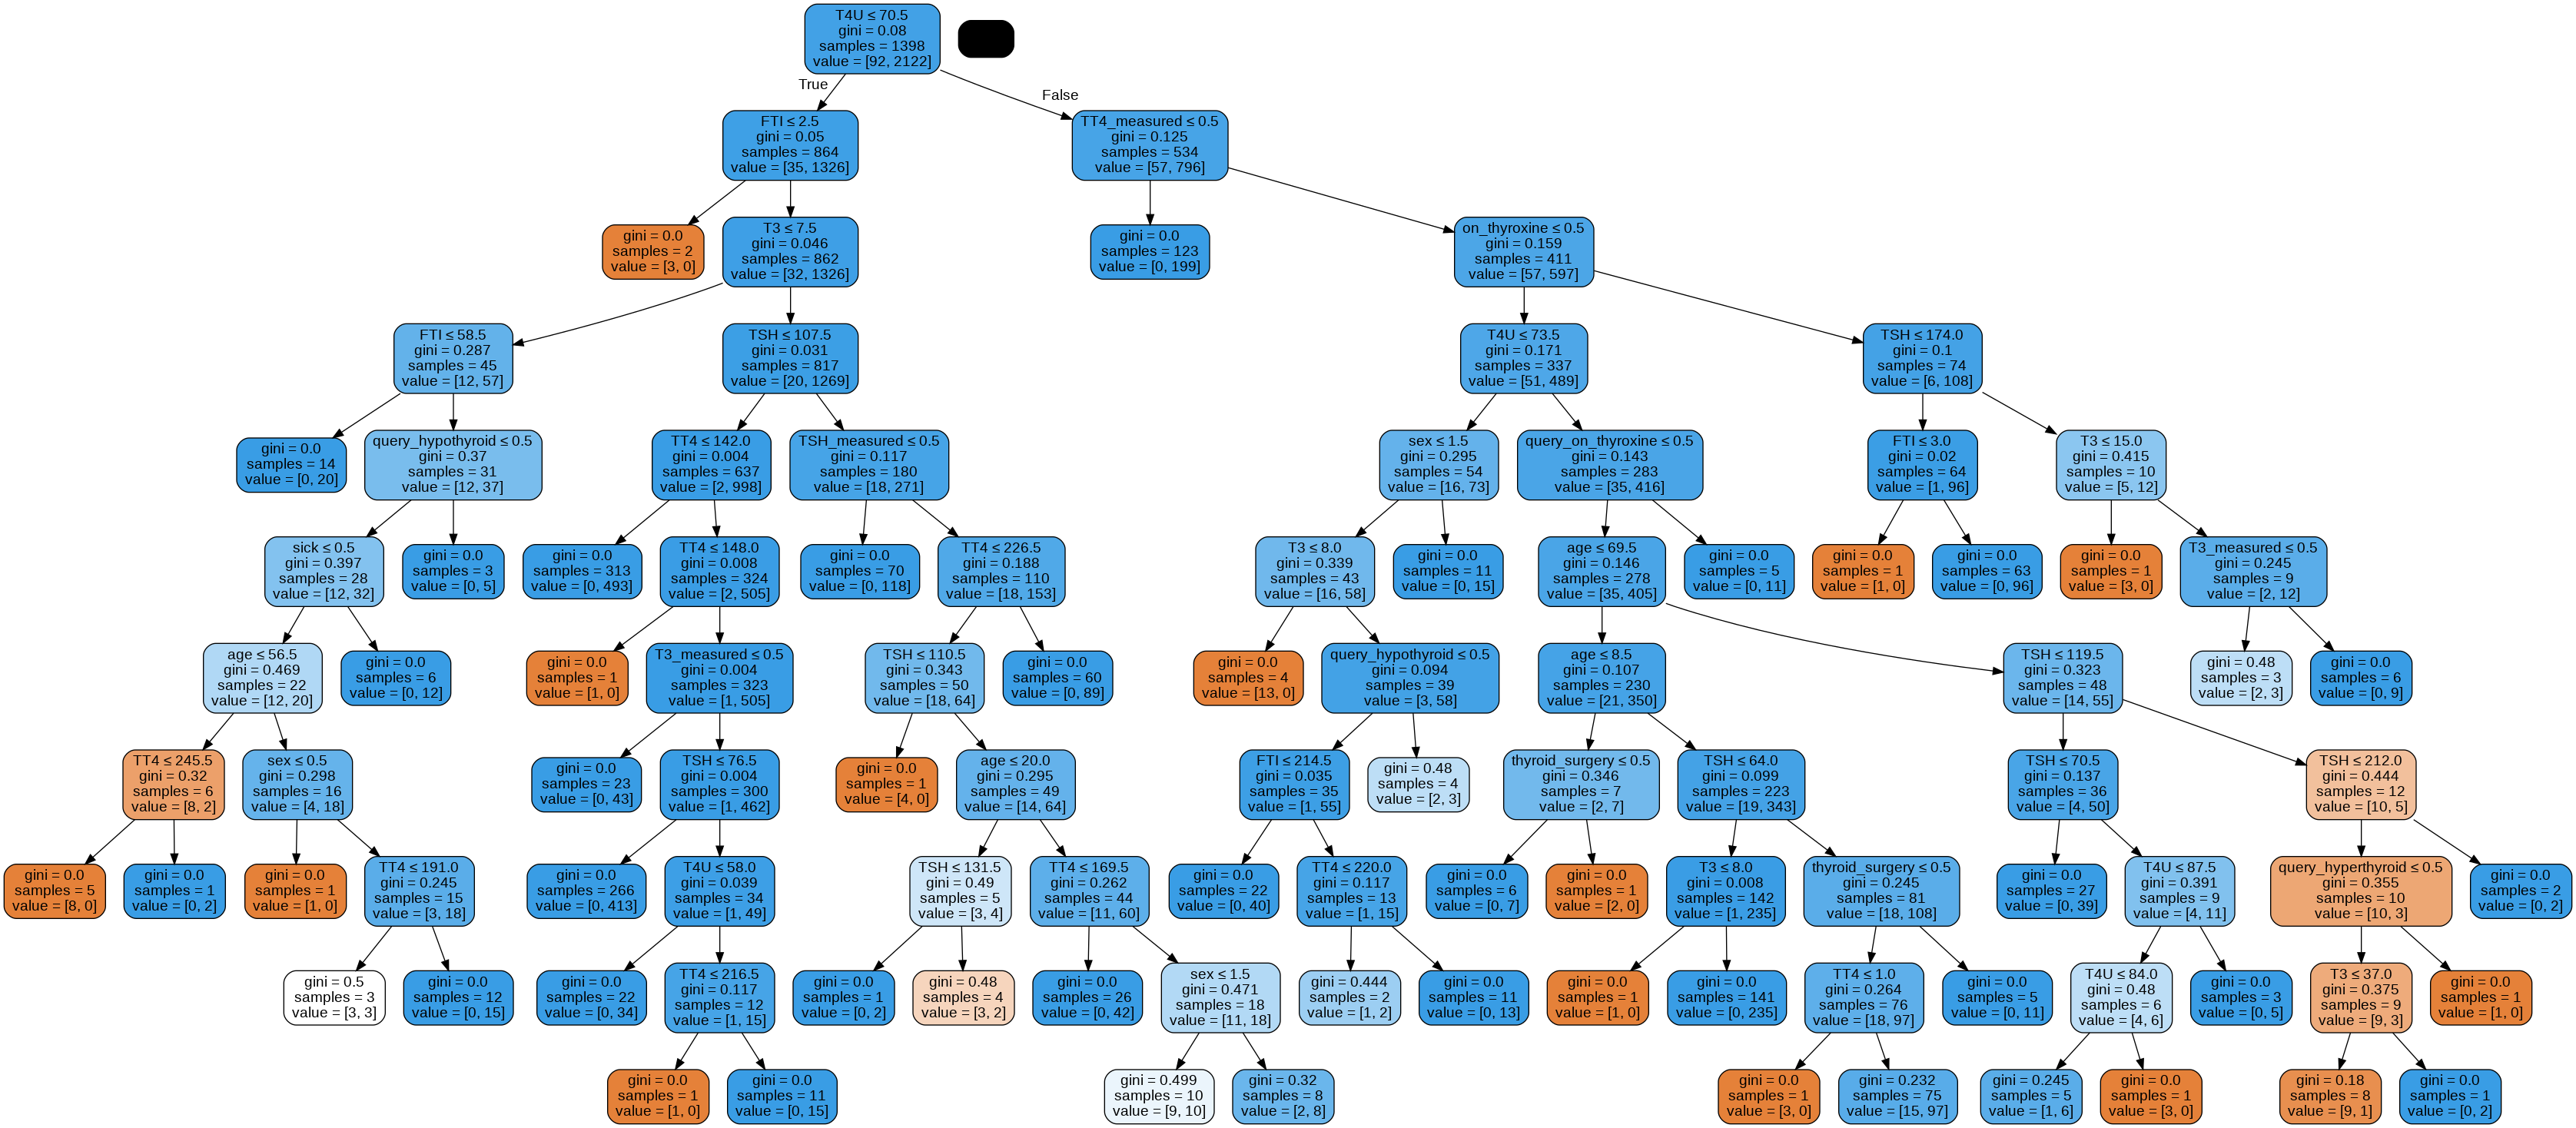

In [19]:
# visualise the data
#
dot_data = StringIO()

tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
               filled=True, rounded=True,
               special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())

The gini impurity for most nodes shows that there is substantial information gain. The accuracy is high though, it may be due to overfitting. The same test will be repeated with the most important features.



In [20]:
# Get numerical feature importances
#
importances = list(forest.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) 
print()

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.04), ('sex', 0.01), ('on_thyroxine', 0.01), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.01), ('query_hypothyroid', 0.01), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.01), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.02), ('TSH', 0.18), ('T3_measured', 0.0), ('T3', 0.22), ('TT4_measured', 0.0), ('TT4', 0.17), ('T4U_measured', 0.0), ('T4U', 0.1), ('FTI_measured', 0.0), ('FTI', 0.2), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: T3                   Importance: 0.22
Variable: FTI                  Importance: 0.2
Variable: TSH                  Importance: 0.18
Variable: TT4                  Importance: 0.17
Variable: T4U                  Importance: 0.1
Variable: age                  Importance: 0.04
Variable: TSH_measured         Importance: 0.02
Variable: sex                  Importance: 0.01
Variable: on_thyroxine         Importance: 0.01
Variable: thyroid_surgery      Importance: 0.01
Variab

In [21]:
# random forest using the most important features
#
y = hypothyr['status'].values

test_features1 =  ['age', 'on_thyroxine', 'thyroid_surgery', 'sick',
                   'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4', 'T4U',
                   'sex', 'FTI', 'query_hypothyroid']

X = hypothyr[test_features1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

forest = RandomForestClassifier(n_estimators = 800, random_state=0, min_samples_split=5, max_depth=10)
forest = forest.fit(X_train, y_train)

y_pred1 = forest.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))



Accuracy: 0.9778714436248683
Mean Absolute Error: 0.022128556375131718
Mean Squared Error: 0.022128556375131718
Root Mean Squared Error: 0.14875670195030447


In [22]:
# cross validate the accuracy 
#

all_accuracies = cross_val_score(estimator=forest, X=X_train, y=y_train, cv=5)

print(all_accuracies.mean())

0.9792253557092223


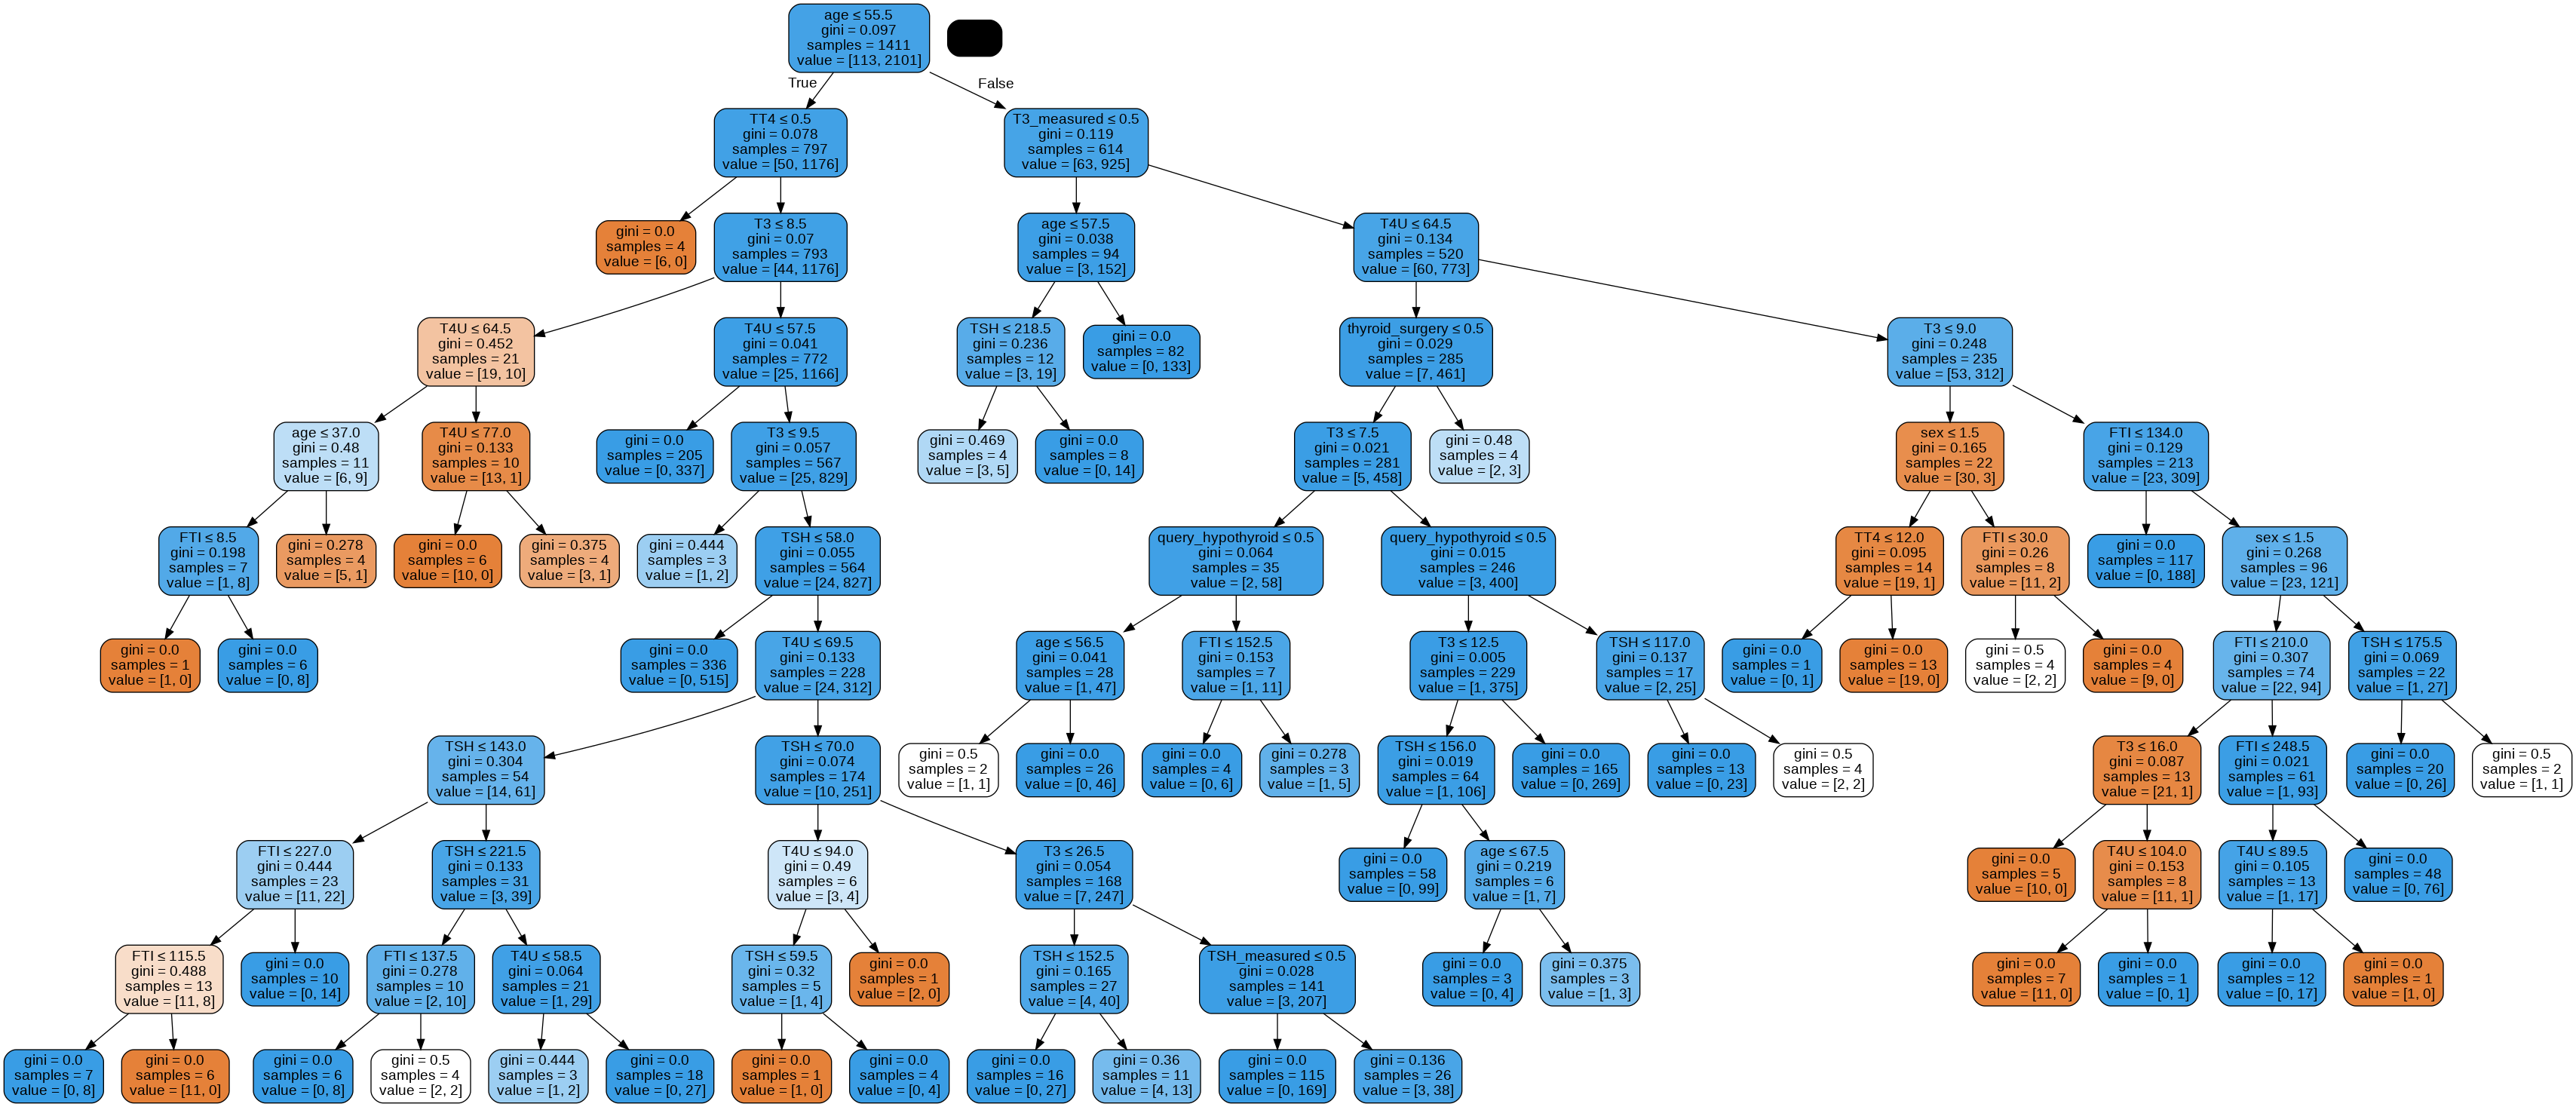

In [23]:
# pick any random tree from the forest
#
dot_data = StringIO()

tree = forest.estimators_[200]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features1)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())


**ii) AdaBoost**



In [70]:
# with adaboost
# the best parameters were already set automatically 
#
y = hypothyr['status'].values

test_features_ =  ['age', 'on_thyroxine', 'thyroid_surgery', 'sick',
                   'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4', 'T4U',
                   'sex', 'FTI', 'query_hypothyroid']

X = hypothyr[test_features_].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

ada_boost = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1)





In [71]:
#checking errors and accuracy
#
all_accuracies = cross_val_score(estimator=ada_boost, X=X_train, y=y_train, cv=5)

print(all_accuracies.mean())

ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada = forest.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))


0.9777777777777779
Accuracy: 0.990280777537797
Mean Absolute Error: 0.009719222462203024
Mean Squared Error: 0.009719222462203024
Root Mean Squared Error: 0.09858611698511624


Both trees have an accuracy of more than 95%. This may show high efficiency or most probably it is due to overfitting. SVM will be used to compare the accuracy.

**B) Using Support Vector Machines:**

**i) Linear**

In [25]:
# drop the duplicates 
#
hypothyr.drop_duplicates(subset = None, keep = 'first', inplace = True)

In [26]:
# Split the independent and dependent variables
# and train using 80% of the data.
#
y = hypothyr['status'].values

X = hypothyr[['T3', 'FTI']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [27]:
# Scale data
#
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [28]:
# fitting the linear svm model
#
thyroid_model = SVC(kernel = 'linear')

thyroid_model.fit(X_train,y_train)

all_accuracies = cross_val_score(estimator=thyroid_model, X=X_train, y=y_train, cv=5)
print(all_accuracies.mean())

y_pred_svm = thyroid_model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_svm))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_svm))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm)))


0.9529986614218491
Accuracy: 0.959546925566343
Mean Absolute Error: 0.040453074433656956
Mean Squared Error: 0.040453074433656956
Root Mean Squared Error: 0.20112949667728242


Even with the high scores, linear would not be suited for this analysis due to the bulk of the data we have.

 **ii) Polynomial**

In [29]:
# Building the model 
polyclassifier = SVC(kernel='poly')#,degree=2,gamma=5)



In [ ]:
# hyperparameter tuning using gridsearchCV
#
grid_param = {'degree': [2, 3, 4, 5, 6],
              'gamma': [2, 4, 6, 8, 10]

}

H_grid = HalvingGridSearchCV(estimator=polyclassifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

H_grid.fit(X_train, y_train)

best_parameters = H_grid.best_params_
print(best_parameters)

best_result = H_grid.best_score_
print(best_result)


In [30]:
# fit polynomial model
#
polyclassifier = SVC(kernel='poly' ,degree=2,gamma=2)

polyclassifier.fit(X_train, y_train)

SVC(degree=2, gamma=2, kernel='poly')

In [ ]:
# Create a mesh grid for our graph
#
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()

title = ('Hypothyroidism status with polynomial SVC')

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [31]:
# making prediction
#
y_pred_pol = polyclassifier.predict(X_test)

all_accuracies = cross_val_score(estimator=polyclassifier, X=X_train, y=y_train, cv=5)
print(all_accuracies.mean())

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_pol))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_pol))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_pol))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pol)))


0.9529986614218491
Accuracy: 0.959546925566343
Mean Absolute Error: 0.040453074433656956
Mean Squared Error: 0.040453074433656956
Root Mean Squared Error: 0.20112949667728242


**iii) Radial Basis Function (RBF).**

In [32]:
# Building the model 
rbfclassifier = SVC(kernel='rbf') 


In [ ]:
# hyperparameter tuning using GridsearchCV
#
grid_param = {'gamma': [2, 4, 6, 8, 10]}

H_grid = HalvingGridSearchCV(estimator=rbfclassifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

H_grid.fit(X_train, y_train)

best_parameters = H_grid.best_params_
print(best_parameters)

best_result = H_grid.best_score_
print(best_result)


In [33]:
# Training the model using the training set
#
rbfclassifier = SVC(kernel='rbf', gamma=10)

rbfclassifier.fit(X_train, y_train)

SVC(gamma=10)

In [ ]:
# Create a mesh grid for our graph
#
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()

title = ('Hypothyroidism Status with rbf SVC')

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [34]:
# making prediction
#
y_pred_rbf = rbfclassifier.predict(X_test)

all_accuracies = cross_val_score(estimator=rbfclassifier, X=X_train, y=y_train, cv=5)
print(all_accuracies.mean())

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rbf))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rbf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rbf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf)))


0.9594846063512659
Accuracy: 0.9563106796116505
Mean Absolute Error: 0.043689320388349516
Mean Squared Error: 0.043689320388349516
Root Mean Squared Error: 0.2090199042874853


RBF is the best performing Kernel. The rest of the features will be included for better analysis using RBF.

In [61]:
# SElecting the most important features from random forest selection
#
y = hypothyr['status'].values

test_features_ =  ['age', 'on_thyroxine', 'thyroid_surgery', 'sick',
                   'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4', 'T4U',
                   'sex', 'FTI', 'query_hypothyroid']

X = hypothyr[test_features_].values

X.shape

(3086, 13)

In [62]:
# scaling the data
#
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [ ]:
# hyperparameter tuning using gridsearchCV
#
grid_param = {'gamma': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
              }

H_grid = HalvingGridSearchCV(estimator=rbfclassifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

H_grid.fit(X_train, y_train)

best_parameters = H_grid.best_params_
print(best_parameters)

best_result = H_grid.best_score_
print(best_result)


In [65]:
# Training the model using the training set
#
rbfclassifier = SVC(kernel='rbf', gamma=4, C=5)

rbfclassifier.fit(X_train, y_train)

#from sklearn.inspection import permutation_importance

#perm_importance = permutation_importance(rbfclassifier, X_test, y_test)

#feature_names = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
#       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
#       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
#       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
#       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']

#features = np.array(feature_names)

#sorted_idx = perm_importance.importances_mean.argsort()

#fig, ax = plt.subplots()
#ax.boxplot(perm_importance.importances[sorted_idx].T, labels=X_test[sorted_idx])
#ax.set_title('Importances')
#fig.tight_layout()
#plt.show()



SVC(C=5, gamma=4)

In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()

title = ('Hypothyroidism Status with rbf SVC')

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [66]:
# making predictions
#
y_pred_rbf = rbfclassifier.predict(X_test)

all_accuracies = cross_val_score(estimator=rbfclassifier, X=X_train, y=y_train, cv=5)
print(all_accuracies.mean())

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rbf))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rbf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rbf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf)))


0.961509719062831
Accuracy: 0.9579288025889967
Mean Absolute Error: 0.042071197411003236
Mean Squared Error: 0.042071197411003236
Root Mean Squared Error: 0.20511264566331164


The features from the random forest were used because the same results were obtained from permutation importance. The data still gives a similar result from the previous model. SVMs are generally less prone to overfitting. We can conclude that RBF classifier is a good classification model for our target variable.

## 7. Challenging the solution

Even though the RBF classifier has proven very accurate. It may still nead to be compared to another model that is not prone to overfitting. This is to ensure that the rbf classifier can be used. Further overall analysis is required due to the sensitive nature of our data and target variable.   

## 8. Follow up questions

### a). Did we have the right data?

Yes.

### b). Do we need other data to answer our question?

It would be advisable to have additional data.

### c). Did we have the right question?

Yes, the regression models present gave predictions with the desired accuracy.